<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 09 - Data Manipulation Part 2

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

In this unit you will learn techniques that will assist you when you come to cleaning data sets. 

* **Replace** data in a DataFrame
* **Change** data type
* **Manage** duplicated data

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning





import numpy as np
import pandas as pd

---

# <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Pandas - Unit 09 - Data Manipulation Part 2

In this notebook we will cover

* how to replace data in your DataFrame using `.replace()`
* how to change data type with `.astype()`
* how to manage duplicated data with `.duplicated()` and `.drop_duplicates()`

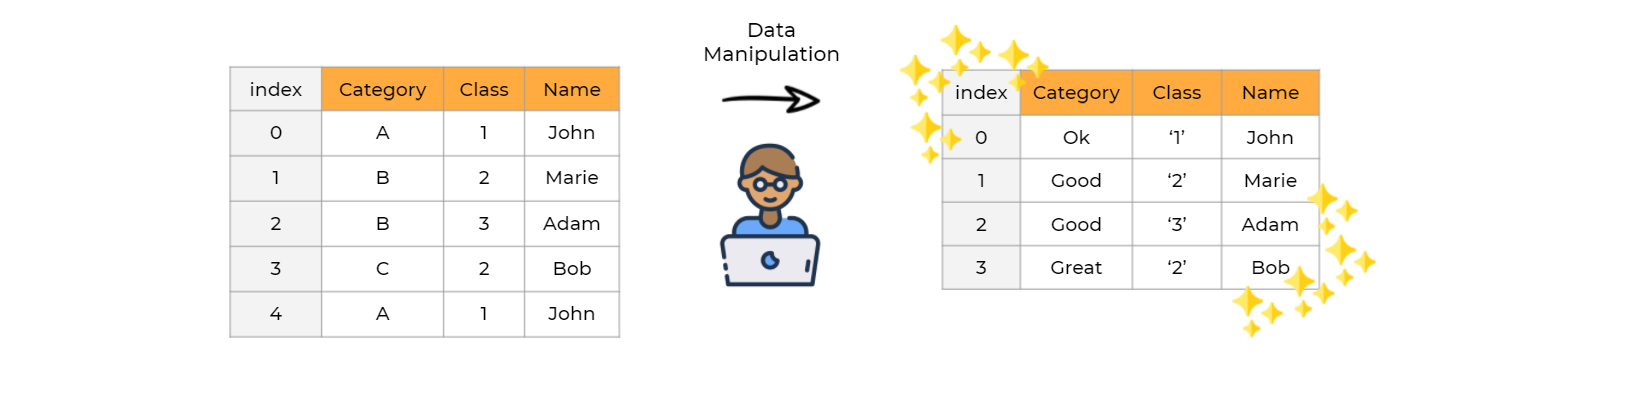

---

Consider the dataset from previous unit

df = pd.DataFrame(data={'Col1':np.random.randint(low=0,high=50,size=10),
                        'Col2':np.random.randn(10),
                        'Col3':['A','B','C','A','A','C','D','B','A','A'],
                        'Col4':np.random.choice([True, False],size=10),
                        'Col5':np.random.randint(low=1,high=4,size=10),
                        'Col6':['X','X','Y','Z','Z','Z','Y','X','Z','Z']},
                  index=pd.date_range(start='01/01/2021', periods=10, freq='M'))
df

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Replace Values

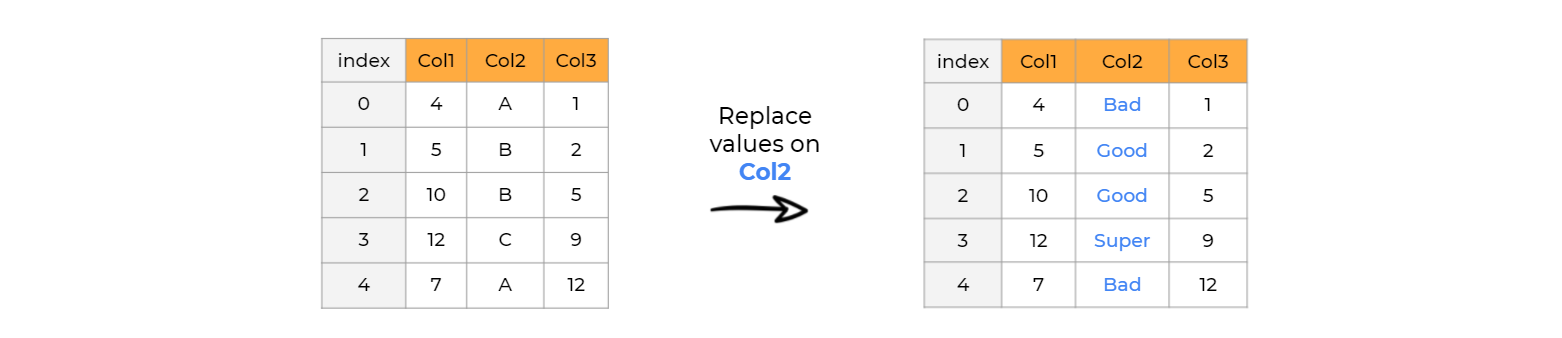

* You can replace values in your dataframe using `.replace()`. You can parse a Python dictionary that will map the values in the '`to_replace`' argument
  * For teaching purposes, first we create a Python dictionary that maps the character keys to human-readable category values. We will map Col3 values to numbers
  *The function documentation can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

map_dict = {'A': 'Nice', 'B': 'Super', 'C':'Amazing', 'D':'Incredible'}
map_dict

We now parse this dictionary
* You can do that in one line. We broke into 2 lines for a better learning experience

* Remember that in the example below we overwrote the existing DataFrame since we set `inplace=True`

df['Col3'].replace(to_replace=map_dict, inplace=True)
df

---

You can replace numbers to a category. The example below replaces the categories from Col6 to numbers

df['Col6'].replace(to_replace={'X': 1, 'Y': 20, 'Z':4000}, inplace=True)
df

You can check the columns data types and note: Col6 is not categorical (object) anymore.


df.dtypes

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : Consider the dataset below. It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/penguins.csv")
df_practice.head()

You notice that MALE and FEMALE are in capital letters

df_practice['sex'].unique()

Replace them with "Male" and "Female". Your output should look like:

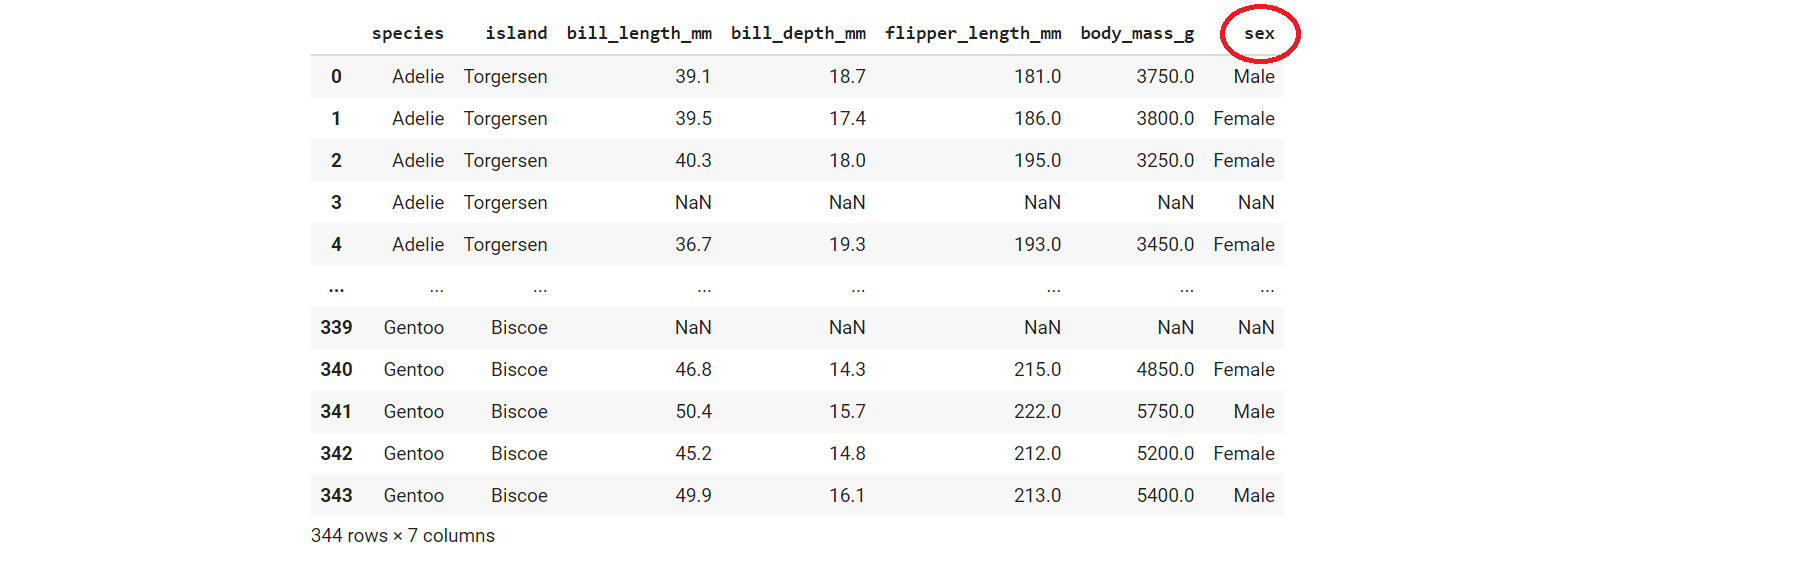

# write your code here.
# You may use inplace=True
df_practice['sex'].replace(to_replace={'MALE':'Male','FEMALE':'Female'}, inplace=True)
df_practice

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Change data type

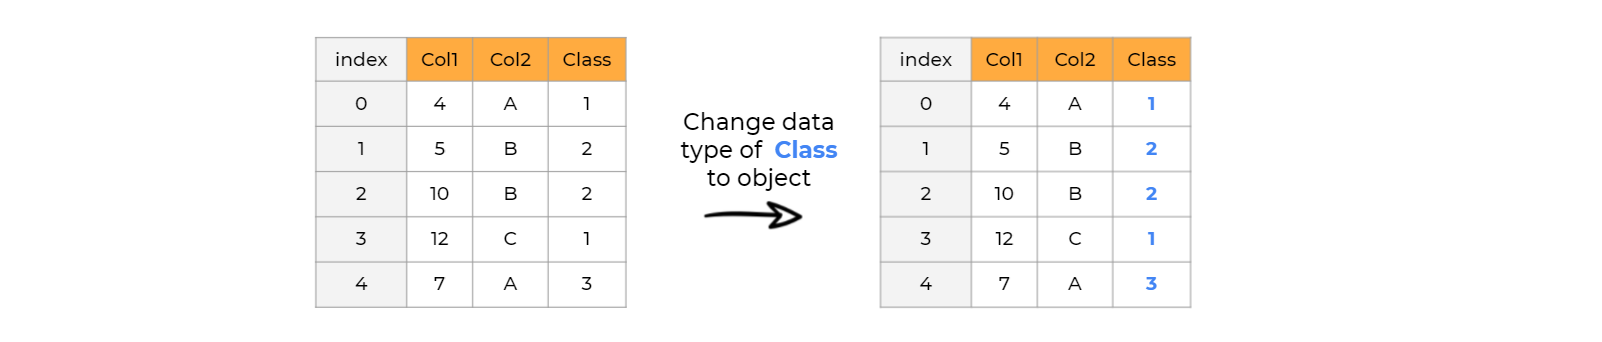

You can also change the data format using the `.astype()` method and parsing in a dictionary the new datatype for a given column.  The documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)
  * Let's recap df using `.head(3)` - since you don't need to see all rows for that

df.head(3)
df.dtypes

You notice that `Col5` data type is integer. However you were informed the content should be categorical. Imagine if the meaning of this variable is 'quality' and ranges from 1 to 3, where 1 is low quality, and 3 is good quality.
  * Now you want to convert `Col5` to categorical/object, so you can properly conduct your data analysis
  * `.astype()` doesn't have '`inplace`' argument, so you can re-assign the DataFrame content like:

df = df.astype({"Col5":"object"})
df

* When you check columns data type you will see that Col5 is object

df.dtypes

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : Consider the dataset below.  It holds passengers records from the Titanic's final voyage.

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/titanic.csv")
df_practice.head()

Note that `survived`	and `pclass` are integer, but we would like them to be `boolean` and `categorical`, respectively.

df_practice[['survived', 'pclass']].info()

Change the data type of `survived` and `pclass` to boolean and categorical, respectively. Then run `df_practice[['survived', 'pclass']].info()` to validate their type 

Your output should look like

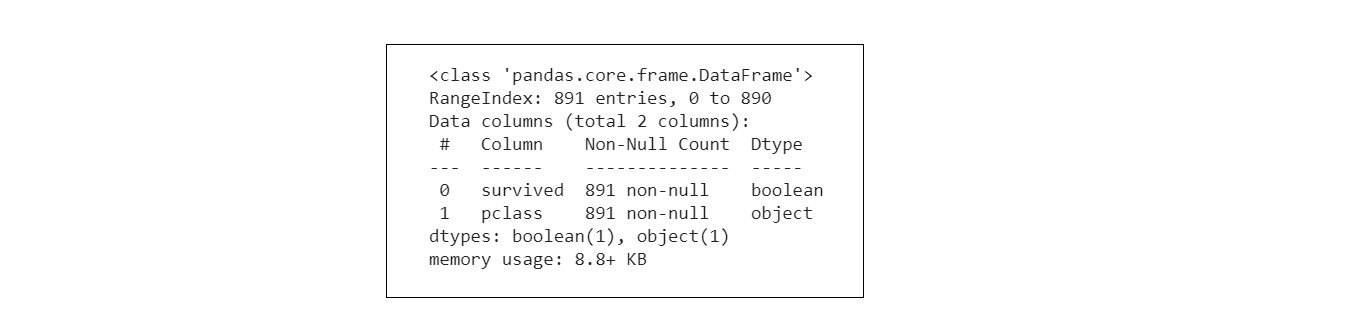

# write your code here
df_practice=df_practice.astype({'survived':'boolean', 'pclass':'object'})
df_practice[['survived', 'pclass']].info

df_practice[['survived', 'pclass']].info()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Managing duplicated data

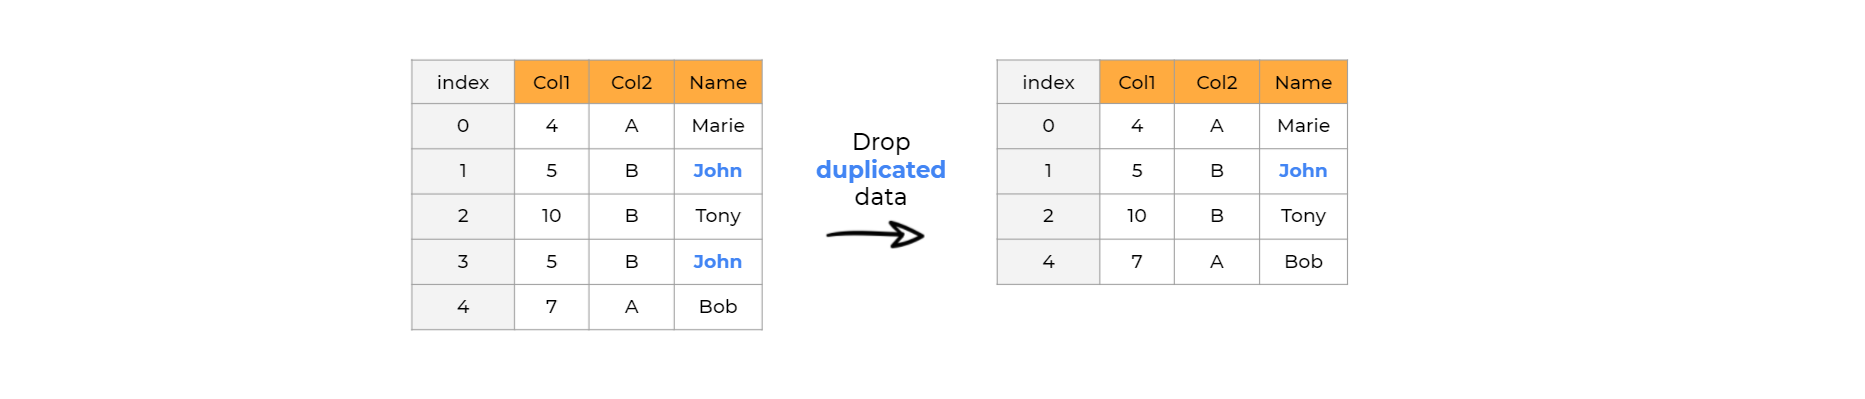

* You can check and drop duplicated data. Consider the DataFrame below

df = pd.DataFrame(data={'Name':['John','Marie','Joseph','John','Willian','Marie'],
                        'CustomerRate':[1,2,2,4,3,3]}
                  )
df

It is decided for this DataFrame that each `Name` should be unique. For some reason, John and Marie are repeated, even though the `CustomerRate` is different. 

However, in this case, it should have only 1 John and only 1 Marie.
* Use `.duplicated()` to grab which rows are repeated in the column you are interested. 
* Use the ``subset`` argument to only consider certain columns for identifying duplicates. By default it uses all columns to check for duplication, but  in this case we are interested only in '`Name`'.  The documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)



df.duplicated(subset=['Name'])

The result is a boolean series, so we parse that to the DataFrame to get the rows themselves. 


  * We can see the index 3 and 5 are duplicated, which happens to be John and Marie
  * By default, when finding a duplicate, it doesn't mark as  duplicate the first occurrence. In the example, it says index 0 (John) is not duplicate, but index 3 is the duplicate

df[df.duplicated(subset=['Name'])]

* But maybe you are interested to see all data marked as duplicated, so you can decide which to remove.
  * In the example, the row with index of 0 is the duplicate of 3, not the opposite. In this case, set the '`keep`' argument as `False` to see all that are duplicates

df[df.duplicated(subset=['Name'], keep=False)]

* You can drop duplicate rows with the method `.drop_duplicates()`, the documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
* Note we set `subset='Name'`, to find duplicates in the column: **Name** 
* And we set `inplace=True`, so we overwrite the DataFrame

df.drop_duplicates(subset=['Name'], inplace=True)
df

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : Consider the dataset below. It is made with NumPy built in functions
* We have the information that the pair `Product_ID` and `Customer_ID` should be unique. For some fictitious reason, a given customer can buy only a given product once in a month.

np.random.seed(seed=1)
df_practice = pd.DataFrame(data={'Product_ID': np.random.randint(low=2,high=8,size=12),
                                 'Customer_ID':np.random.randint(low=1,high=8,size=12),
                                 'Value': np.random.randint(low=900,high=999,size=12),
                        })
df_practice

You should show all data marked as duplicated.


Your output should look like

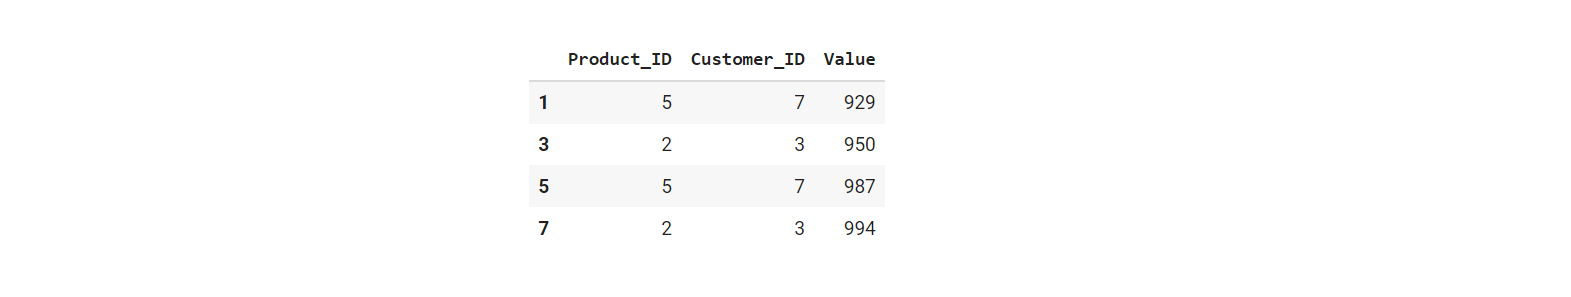

# write your code here
df_practice[df_practice.duplicated(subset=['Product_ID','Customer_ID'], keep=False)]

Then, drop the duplicates. Your output should look as shown below. Pay attention to the indices you saw in the previous practice to check which rows were removed.

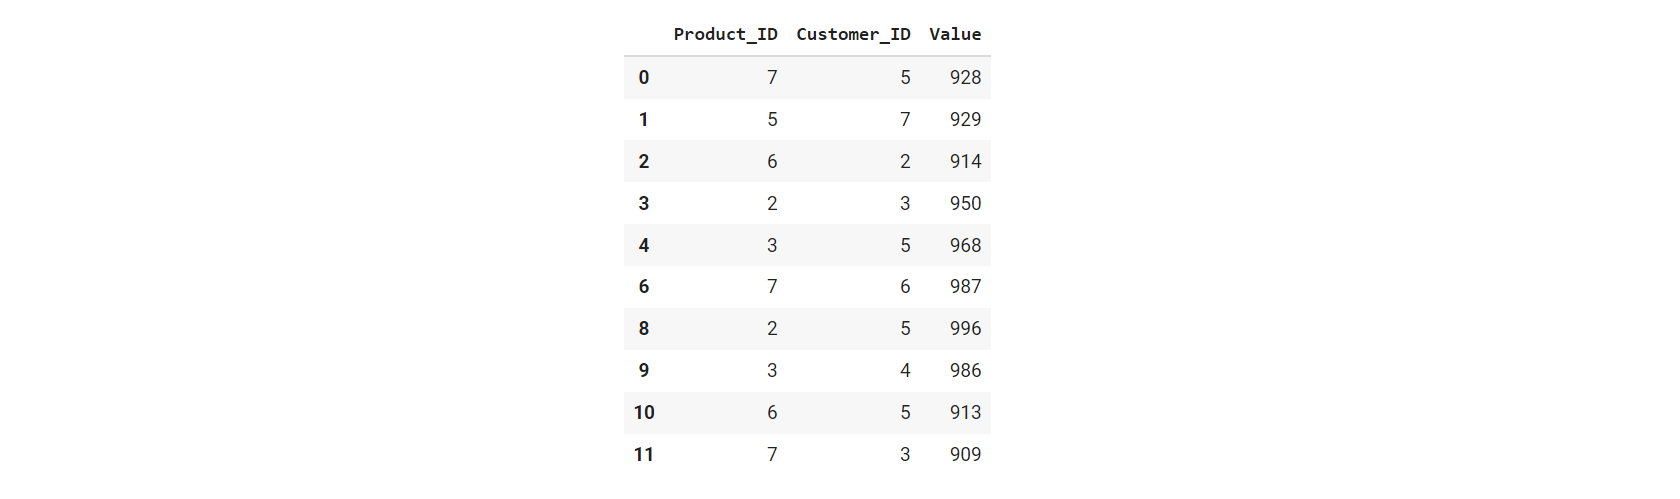

# write your code here
df_practice.drop_duplicates(subset=['Product_ID','Customer_ID'], inplace=True)
df_practice

---